In [1]:
import pandas as pd

## USING RAW UNCLEAN DATA

In [2]:
og_breast_cancer_data = pd.read_csv('data.txt', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

In [3]:
# og_breast_cancer_data['Class'] = og_breast_cancer_data['Class'].replace([2,4], [0,1])

In [4]:
test = pd.DataFrame(og_breast_cancer_data)

In [5]:
og_breast_cancer_data.head()

,id,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
og_breast_cancer_data.isnull().values.any()

False

In [7]:
og_breast_cancer_data.drop('id',axis=1,inplace=True)

In [8]:
og_breast_cancer_data['target'] = og_breast_cancer_data['target'].map({'M':1,'B':0})

In [9]:
from sklearn import preprocessing

In [10]:
datas = pd.DataFrame(preprocessing.scale(og_breast_cancer_data.iloc[:,1:32]))
datas.columns = list(og_breast_cancer_data.iloc[:,1:32].columns)
datas['target'] = og_breast_cancer_data['target']

In [11]:
datas.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [12]:
import numpy as np

In [13]:
X = datas.iloc[:,:-1]
y = np.ravel(datas.loc[:,["target"]])

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape

(455, 30)

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()

In [20]:
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 97.81


### EDA

In [21]:
malignant = og_breast_cancer_data.loc[og_breast_cancer_data['target'] == 1]

In [22]:
malignant.tail()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
563,1,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [23]:
benign = og_breast_cancer_data.loc[og_breast_cancer_data['target'] == 0]

In [24]:
benign.tail()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [25]:
from scipy import stats, integrate

In [26]:
import seaborn as sns
sns.set(color_codes=True)

In [27]:
hi = benign.describe()
bi = malignant.describe()

In [28]:
hi

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


1


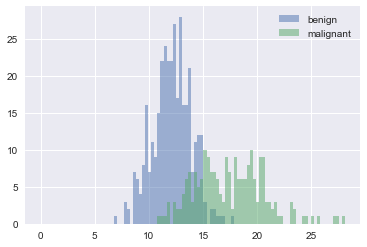

2


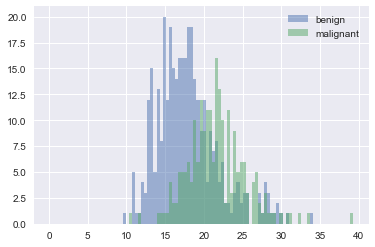

3


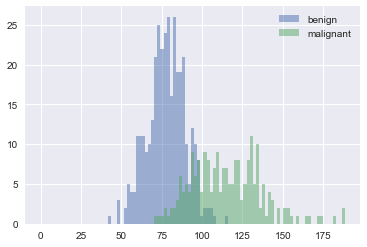

4


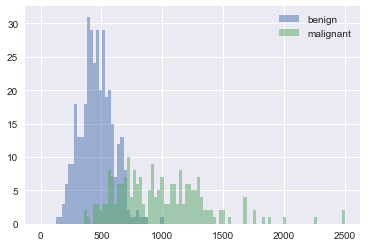

5


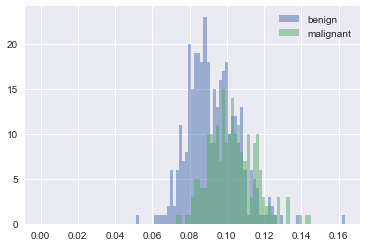

6


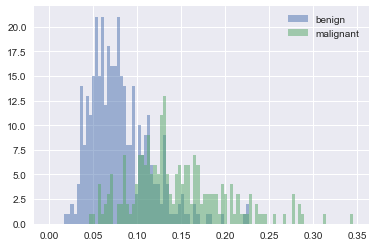

7


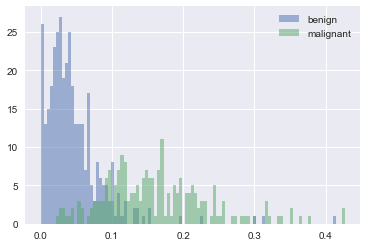

8


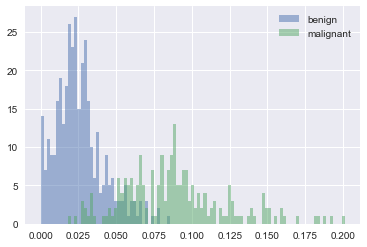

9


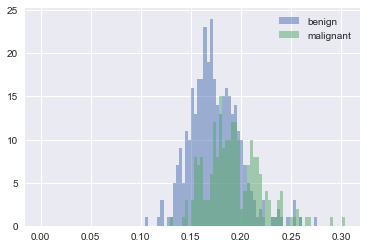

10


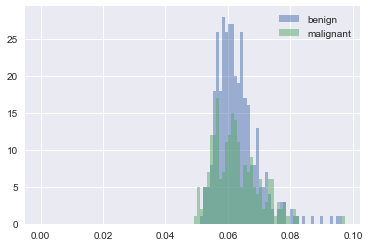

11


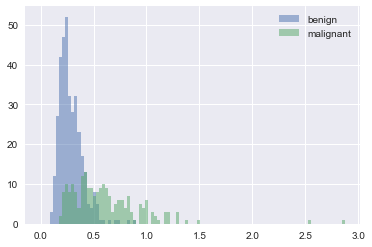

12


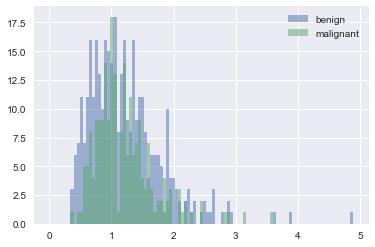

13


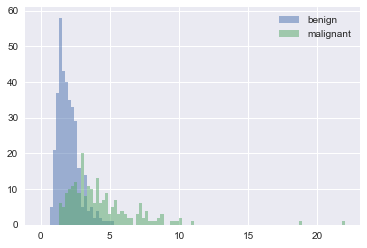

14


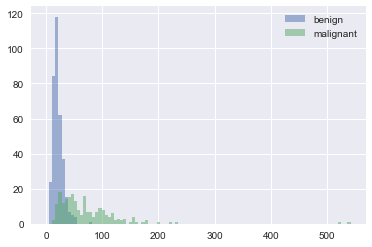

15


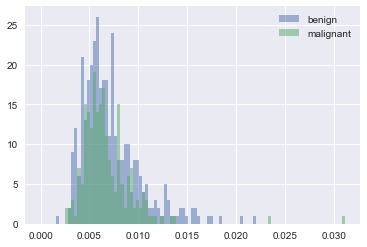

16


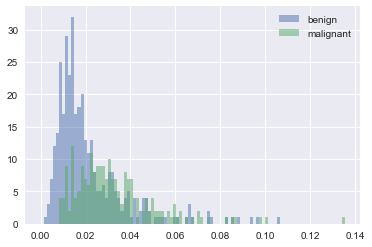

17


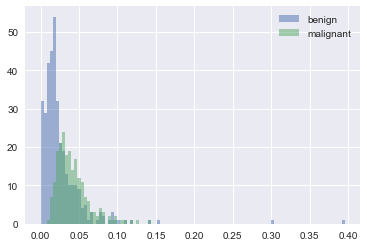

18


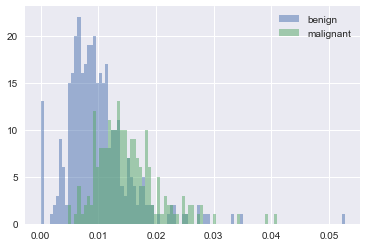

19


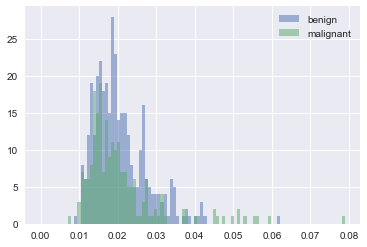

20


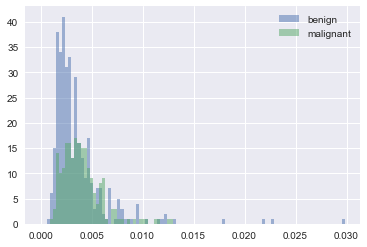

21


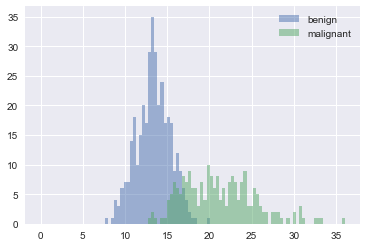

22


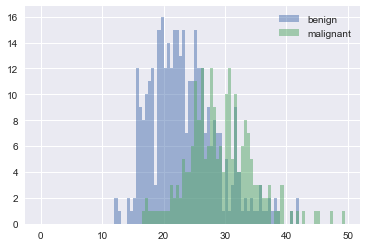

23


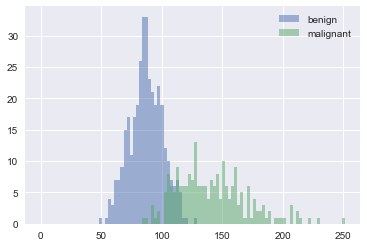

24


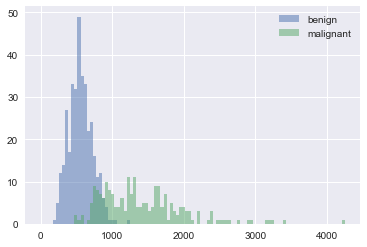

25


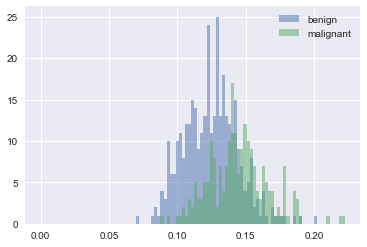

26


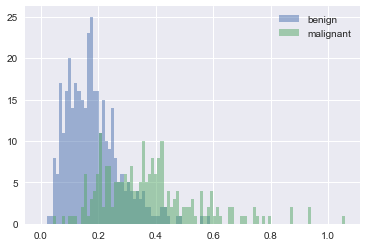

27


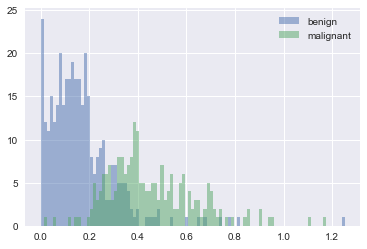

28


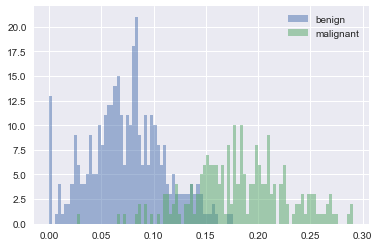

29


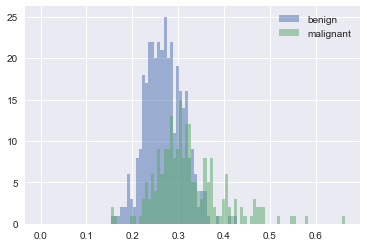

30


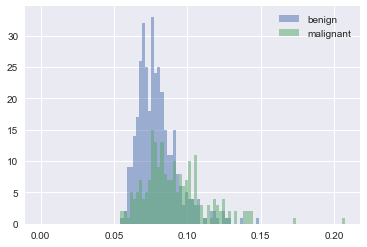

In [31]:
for x in range(1,31,1):
    print(x)
    test1 = benign.iloc[:,x]
    test2 = malignant.iloc[:,x]
    
    upper = max(max(test1),max(test2))
    
    bins = np.linspace(0, upper, 100)

    plt.hist(test1, bins, alpha=0.5, label='benign')
    plt.hist(test2, bins, alpha=0.5, label='malignant')
    plt.legend(loc='upper right')
    plt.show()

In [32]:
import seaborn as sns

In [33]:
data_mean = og_breast_cancer_data

In [34]:
data_mean.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


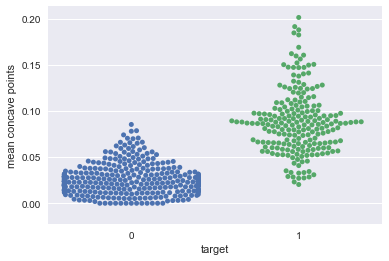

In [50]:
_ = sns.swarmplot(y='mean concave points', x='target', data=data_mean)
plt.show()

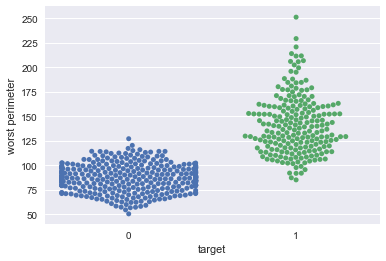

In [40]:
_ = sns.swarmplot(y='worst perimeter', x='target', data=data_mean)
plt.show()

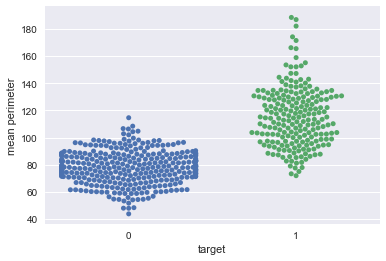

In [41]:
_ = sns.swarmplot(y='mean perimeter', x='target', data=data_mean)
plt.show()

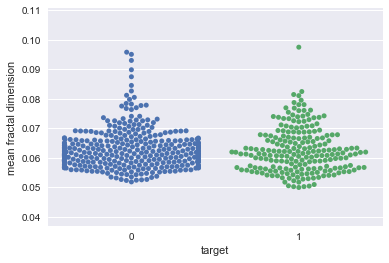

In [36]:
_ = sns.swarmplot(y='mean fractal dimension', x='target', data=data_mean)
plt.show()

In [37]:
colormap = 'viridis'


In [38]:
data_mean.corr().iloc[0,:]

target                     1.000000
mean radius                0.730029
mean texture               0.415185
mean perimeter             0.742636
mean area                  0.708984
mean smoothness            0.358560
mean compactness           0.596534
mean concavity             0.696360
mean concave points        0.776614
mean symmetry              0.330499
mean fractal dimension    -0.012838
radius error               0.567134
texture error             -0.008303
perimeter error            0.556141
area error                 0.548236
smoothness error          -0.067016
compactness error          0.292999
concavity error            0.253730
concave points error       0.408042
symmetry error            -0.006522
fractal dimension error    0.077972
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782914
worst area                 0.733825
worst smoothness           0.421465
worst compactness          0.590998
worst concavity            0

In [ ]:
# plt.figure(figsize=(16,16))
# foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True, cmap=colormap)

## USING SKLEARN DATASET

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split

In [30]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
print(cancer.DESCR)

In [ ]:
print(cancer.feature_names)

In [ ]:
print(cancer.target_names)

In [ ]:
type(cancer.data)

In [ ]:
cancer.data.shape

In [ ]:
cancer.data[0]

In [ ]:
# alternative to test_size=0.2, random_state=0 is stratify = cancer.target, random_state = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()

In [ ]:
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))